# INTRODUCTION

In [20]:
#packages being used

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [2]:
#Load the Dataset
df = pd.read_csv('fraud.csv')

In [3]:
# Check for missing values
print(df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# Removal of columns

df.drop(['cc_num', 'first', 'last', 'street', 'merchant','is_fraud'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   category               1048575 non-null  object 
 2   amt                    1048575 non-null  float64
 3   gender                 1048575 non-null  object 
 4   city                   1048575 non-null  object 
 5   state                  1048575 non-null  object 
 6   zip                    1048575 non-null  int64  
 7   lat                    1048575 non-null  float64
 8   long                   1048575 non-null  float64
 9   city_pop               1048575 non-null  int64  
 10  job                    1048575 non-null  object 
 11  dob                    1048575 non-null  object 
 12  trans_num              1048575 non-null  object 
 13  unix_time              1048575 non-null  int64  
 14  merch_lat         

In [10]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [11]:
unique_categories = df['category'].unique()
print(unique_categories)
num_unique_jobs = df['category'].nunique()
print(num_unique_jobs)


['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
14


In [12]:
num_unique_jobs = df['job'].nunique()
print(num_unique_jobs)

493


In [13]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'category' column and transform the values
encoded_category = label_encoder.fit_transform(df['category'])

# Create a mapping dictionary for category labels and their encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Replace the original 'category' column with the encoded values
df['category'] = encoded_category

# Print the mapping dictionary
print(category_mapping)

{'entertainment': 0, 'food_dining': 1, 'gas_transport': 2, 'grocery_net': 3, 'grocery_pos': 4, 'health_fitness': 5, 'home': 6, 'kids_pets': 7, 'misc_net': 8, 'misc_pos': 9, 'personal_care': 10, 'shopping_net': 11, 'shopping_pos': 12, 'travel': 13}


In [14]:
# Convert unix_time to datetime object
df['transaction_datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract useful information from datetime
df['year'] = df['transaction_datetime'].dt.year
df['month'] = df['transaction_datetime'].dt.month
df['day'] = df['transaction_datetime'].dt.day

# Drop the original unix_time column
df.drop(['unix_time', 'transaction_datetime'], axis=1, inplace=True)

In [15]:
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)
df.drop(["lat", "long", "merch_lat", "merch_long"], axis=1, inplace=True)
df.insert(3, 'distance', df.pop('distance'))

In [16]:
df = df[['category', 'distance', 'amt', 'gender', 'zip', 'city_pop', 'year', 'month', 'day']]
df

,category,distance,amt,gender,zip,city_pop,year,month,day
0,8,0.872830,4.97,1,28654,3495,2012,1,1
1,4,0.272310,107.23,1,99160,149,2012,1,1
2,0,0.975845,220.11,0,83252,4154,2012,1,1
3,2,0.919802,45.00,0,59632,1939,2012,1,1
4,9,0.868505,41.96,0,24433,99,2012,1,1
...,...,...,...,...,...,...,...,...,...
1048570,5,0.343496,77.00,1,21405,92106,2013,3,10
1048571,9,0.470436,116.94,1,52563,1583,2013,3,10
1048572,6,1.348350,21.27,1,40202,736284,2013,3,10
1048573,5,1.306113,9.52,1,11796,4056,2013,3,10


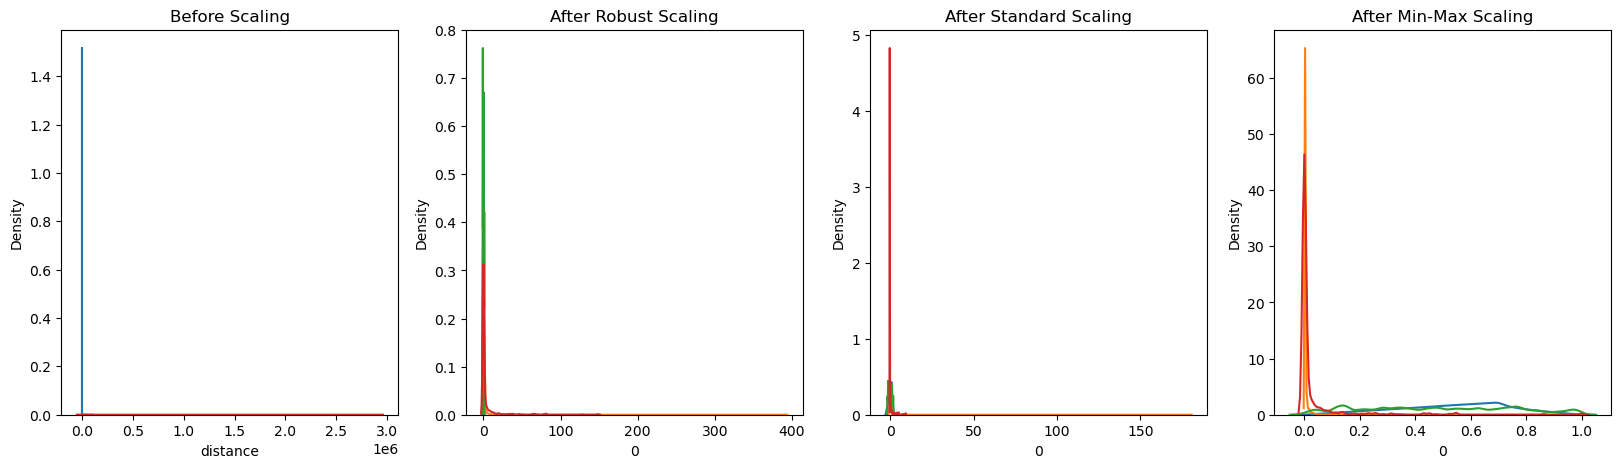

In [17]:
# Apply scaling
scaler = RobustScaler()
robust_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
robust_df = pd.DataFrame(robust_df)

scaler = StandardScaler()
standard_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
standard_df = pd.DataFrame(standard_df)

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
minmax_df = pd.DataFrame(minmax_df)

# Plotting the distributions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['distance'], ax=ax1)
sns.kdeplot(df['amt'], ax=ax1)
sns.kdeplot(df['zip'], ax=ax1)
sns.kdeplot(df['city_pop'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df[0], ax=ax2)
sns.kdeplot(robust_df[1], ax=ax2)
sns.kdeplot(robust_df[2], ax=ax2)
sns.kdeplot(robust_df[3], ax=ax2)

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df[0], ax=ax3)
sns.kdeplot(standard_df[1], ax=ax3)
sns.kdeplot(standard_df[2], ax=ax3)
sns.kdeplot(standard_df[3], ax=ax3)

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[0], ax=ax4)
sns.kdeplot(minmax_df[1], ax=ax4)
sns.kdeplot(minmax_df[2], ax=ax4)
sns.kdeplot(minmax_df[3], ax=ax4)

plt.show()

In [18]:
# Apply scaling
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[['distance', 'amt', 'zip', 'city_pop']])
df[['distance', 'amt', 'zip', 'city_pop']] = scaled_features

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_k

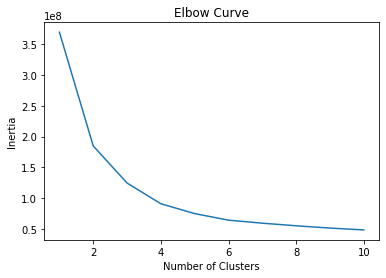

In [22]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [23]:
# Based on the elbow curve, select the number of clusters
k = 3

# Fit k-means model with the selected number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
# Add cluster labels to the dataset
df['cluster_label'] = kmeans.labels_

# Print the number of data points in each cluster
print(df['cluster_label'].value_counts())

2    511030
0    503027
1     34518
Name: cluster_label, dtype: int64


In [29]:
from sklearn.metrics import silhouette_score

# Evaluate Cluster Quality
inertia_k3 = kmeans.inertia_
silhouette_k3 = silhouette_score(df, kmeans.labels_) 
print("Inertia:", inertia_k3)
print("Silhouette Score:", silhouette_k3)

Inertia: 124355492.54394352
Silhouette Score: 0.38895114873196973


In [20]:
import time
from sklearn.metrics import silhouette_score

# Define the range of k values
k_values = [2, 4]

# Iterate over each k value
for k in k_values:
    # Fit k-means model with the selected number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    start_time = time.time()
    kmeans.fit(df)
    end_time = time.time()
    
    # Evaluate cluster quality
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df, kmeans.labels_) 
    
    # Print the results
    print(f"Results for k = {k}:")
    print("Inertia:", inertia)
    print("Silhouette Score:", silhouette)
    print("Time Taken:", end_time - start_time)
    print()


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Results for k = 2:
Inertia: 184650545.356413
Silhouette Score: 0.7692376598494076
Time Taken: 4.362890720367432



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Results for k = 4:
Inertia: 90642836.32347873
Silhouette Score: 0.39927776028495665
Time Taken: 5.146243333816528



In [26]:
# Based on the elbow curve, select the number of clusters
k = 2 #based on evaluation scores

# Fit k-means model with the selected number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [27]:
# Add cluster labels to the dataset
df['cluster_label'] = kmeans.labels_

# Print the number of data points in each cluster
print(df['cluster_label'].value_counts())

0    1007777
1      40798
Name: cluster_label, dtype: int64


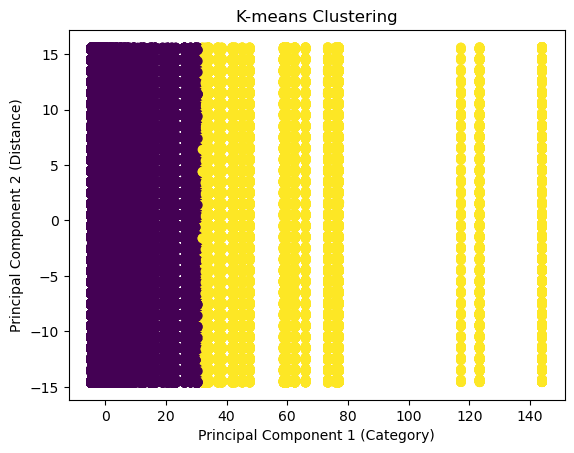

In [32]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df.drop('cluster_label', axis=1))

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Principal Component 1 (Category)')
plt.ylabel('Principal Component 2 (Distance)')
plt.title('K-means Clustering')
plt.show()

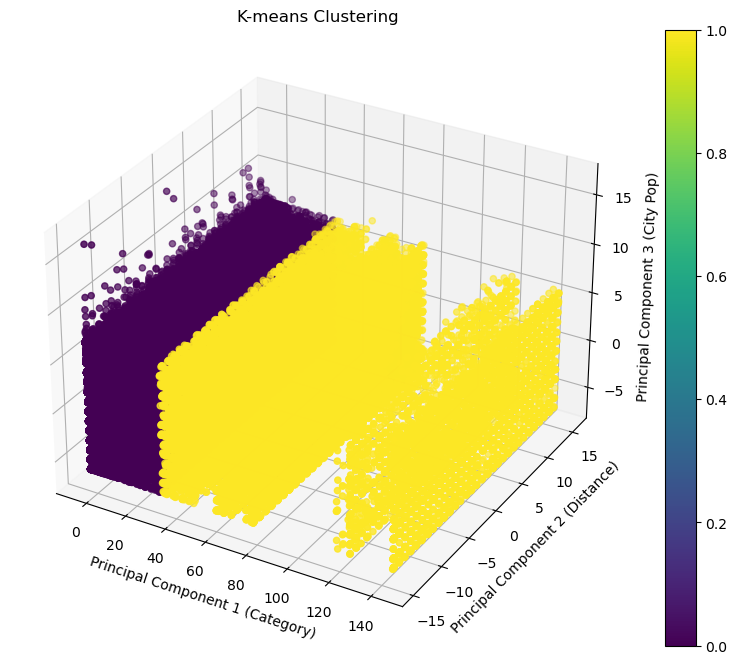

In [39]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(df.drop('cluster_label', axis=1))

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=df['cluster_label'], cmap='viridis')
ax.set_xlabel('Principal Component 1 (Category)')
ax.set_ylabel('Principal Component 2 (Distance)')
ax.set_zlabel('Principal Component 3 (City Pop)')
ax.set_title('K-means Clustering')
plt.colorbar(scatter)
plt.show()

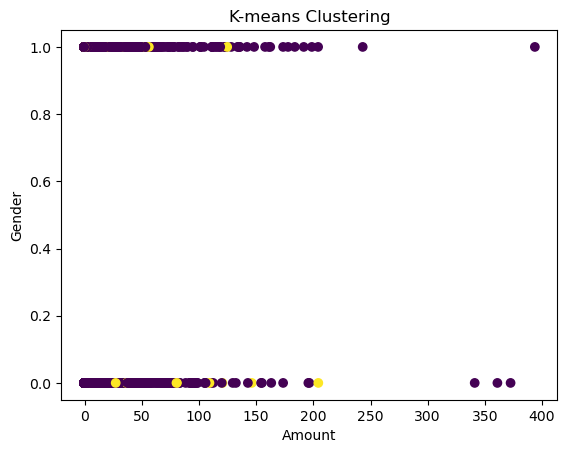

In [35]:
# Visualize the clusters
plt.scatter(df['amt'], df['gender'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Gender')
plt.title('K-means Clustering')
plt.show()

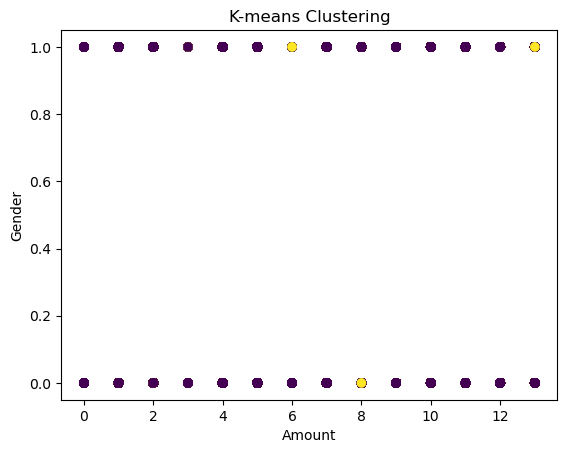

In [36]:
# Visualize the clusters
plt.scatter(df['category'], df['gender'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Gender')
plt.title('K-means Clustering')
plt.show()

In [30]:
# Print the cluster centers
cluster_centers = kmeans.cluster_centers_
print('Cluster Centers:')
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i}:')
    print(center)
    print()

Cluster Centers:
Cluster 0:
[ 6.22413986e+00 -7.88708119e-02  3.09180284e-01  5.44032063e-01
  3.37614338e-03  1.74991143e+00  2.01211802e+03  6.51456324e+00
  1.55326228e+01  1.48367446e+00]

Cluster 1:
[ 6.35379185e+00 -8.05545648e-02  3.55454557e-01  6.30055395e-01
  2.68750908e-01  7.04228540e+01  2.01211736e+03  6.52056473e+00
  1.55152213e+01  1.13373205e+00]



In [43]:
# Calculate pairwise distances between cluster centroids
cluster_centroids = kmeans.cluster_centers_  # Replace `kmeans` with your K-means model variable
distance_matrix = pairwise_distances(cluster_centroids)

# Display the distance matrix
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[ 0.         68.67454122]
 [68.67454122  0.        ]]


In [20]:
# Group the data by cluster label and calculate the proportion of fraudulent transactions in each cluster
cluster_fraud_proportions = df.groupby('cluster_label')['is_fraud'].mean()

# Print the proportions
for cluster in cluster_fraud_proportions.index:
    print(f"Cluster {cluster}: Fraud Proportion = {cluster_fraud_proportions[cluster]}")

Cluster 0: Fraud Proportion = 0.005726465279521164
Cluster 1: Fraud Proportion = 0.0057600862787391535


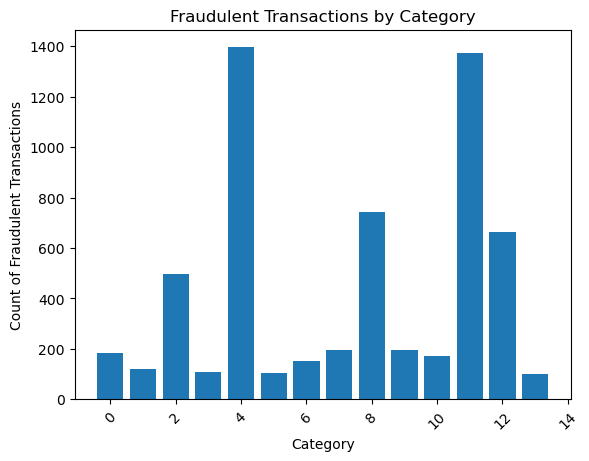

In [51]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'category' and 'is_fraud'
fraud_counts = df[df['is_fraud'] == 1]['category'].value_counts()

# Plot the count of fraudulent transactions by category
plt.bar(fraud_counts.index, fraud_counts)
plt.xlabel('Category')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Category')
plt.xticks(rotation=45)
plt.show()


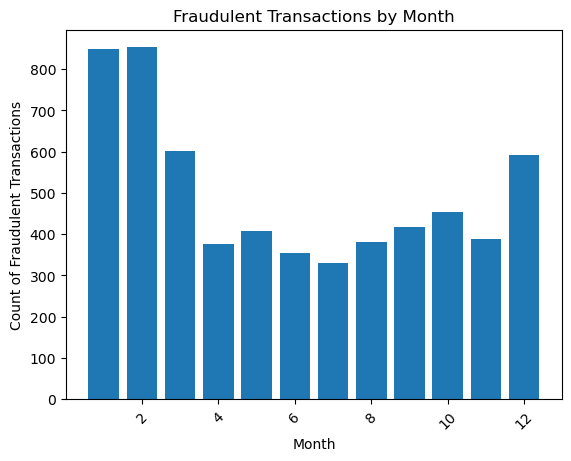

In [52]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'category' and 'is_fraud'
fraud_counts = df[df['is_fraud'] == 1]['month'].value_counts()

# Plot the count of fraudulent transactions by category
plt.bar(fraud_counts.index, fraud_counts)
plt.xlabel('Month')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Month')
plt.xticks(rotation=45)
plt.show()


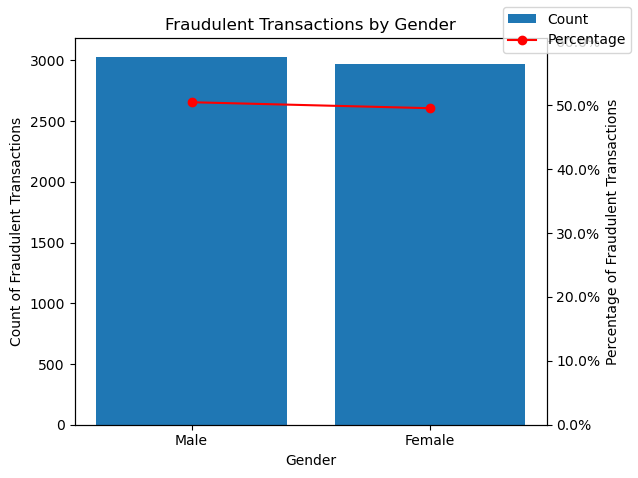

In [53]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'gender' and 'is_fraud'
fraud_counts = df[df['is_fraud'] == 1]['gender'].value_counts()

# Map the gender values to their corresponding labels
gender_labels = {1: 'Female', 0: 'Male'}
fraud_counts.index = fraud_counts.index.map(gender_labels)

# Calculate the percentage of fraudulent transactions within each gender category
fraud_percentages = fraud_counts / len(df[df['is_fraud'] == 1]) * 100

# Plot the count and percentage of fraudulent transactions by gender
fig, ax = plt.subplots()
ax.bar(fraud_counts.index, fraud_counts, label='Count')
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Fraudulent Transactions')
ax.set_title('Fraudulent Transactions by Gender')
ax2 = ax.twinx()
ax2.plot(fraud_counts.index, fraud_percentages, color='red', marker='o', label='Percentage')
ax2.set_ylabel('Percentage of Fraudulent Transactions')
ax2.set_ylim(0, max(fraud_percentages) + 10)
ax2.yaxis.set_major_formatter('{x:.1f}%')
fig.tight_layout()
fig.legend()
plt.show()


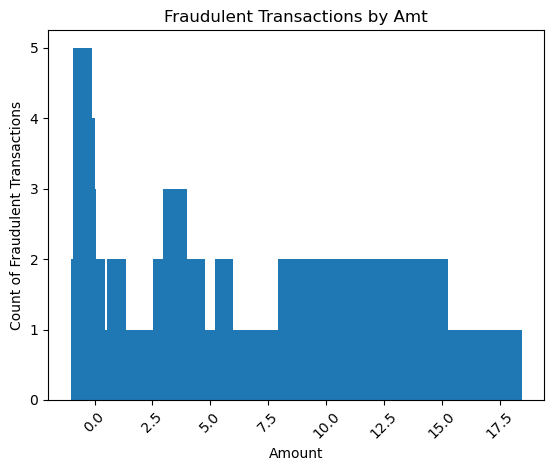

In [54]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'category' and 'is_fraud'
fraud_counts = df[df['is_fraud'] == 1]['amt'].value_counts()

# Plot the count of fraudulent transactions by category
plt.bar(fraud_counts.index, fraud_counts)
plt.xlabel('Amount')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Amt')
plt.xticks(rotation=45)
plt.show()
